In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
path_results = "/develop/results/results/results_05_23_model_encoderTraining"
filename = 'enc_only_fixedData.pkl'

enc_only = pickle.load(open(os.path.join(path_results,filename),"rb"))
enc_only = sorted(enc_only, key=lambda x: x['learning_rate'])

#     print(result['title'], result['learning_rate'])
print(len(enc_only[0]['train_truth_phase']))
print(len(enc_only[0]['valid_truth_phase']))
print(enc_only[0].keys())

1216
304
dict_keys(['gamma', 'backbone', 'learning_rate', 'valid_truth_phase', 'valid_pred_phase', 'train_truth_phase', 'train_pred_phase', 'title'])


In [3]:
print(enc_only[0]['valid_truth_phase'].max())
print(enc_only[0]['valid_truth_phase'].min())

2.671871
-3.0018585


In [4]:
gamma, backbone, learning_rate, valid_truth_phase, valid_pred_phase, train_truth_phase, train_pred_phase, title = [], [], [], [], [], [], [], []

for item in enc_only:
    gamma.append(item['gamma'])
    backbone.append(item['backbone'])
    learning_rate.append(item['learning_rate'])
    valid_truth_phase.append(item['valid_truth_phase'])
    valid_pred_phase.append(item['valid_pred_phase'])
    train_truth_phase.append(item['train_truth_phase'])
    train_pred_phase.append(item['train_pred_phase'])
    title.append(item['title'])

In [5]:
gamma = np.asarray(gamma)
backbone = np.asarray(backbone)
learning_rate = np.asarray(learning_rate)
valid_truth_phase = np.asarray(valid_truth_phase)
valid_pred_phase = np.asarray(valid_pred_phase)
train_truth_phase = np.asarray(train_truth_phase)
train_pred_phase = np.asarray(train_pred_phase)
title = np.asarray(title)

len(gamma)
backbone

array(['resnet18', 'resnet50', 'resnet34', 'resnet50', 'resnet18',
       'resnet34', 'resnet34', 'resnet18', 'resnet50', 'resnet34',
       'resnet50', 'resnet18', 'resnet34', 'resnet18', 'resnet50',
       'resnet50', 'resnet34', 'resnet18', 'resnet18', 'resnet50',
       'resnet34', 'resnet18', 'resnet34', 'resnet50', 'resnet50',
       'resnet18', 'resnet34', 'resnet18', 'resnet50', 'resnet34'],
      dtype='<U8')

In [10]:
def idk(truth_phase, pred_phase):
    new_truth_data, new_pred_data = [], []
    for(d1,d2) in zip(truth_phase, pred_phase):
        if((d1 > 2.8).any() or (d1 < -2.8).any()):
            idx1, = np.where(d1>2.8)
            idx2, = np.where(d1<-2.8)
            indices = np.concatenate((idx1,idx2))
            d1 = np.delete(d1,indices)
            d2 = np.delete(d2,indices)
        new_truth_data.append(d1)
        new_pred_data.append(d2)
    return new_truth_data, new_pred_data
            
valid_truth, valid_preds = [], []

for i, j in zip(valid_truth_phase, valid_pred_phase):
    temp1, temp2 = idk(i, j)
    valid_truth.append(temp1)
    valid_preds.append(temp2)

In [11]:
train_truth, train_preds = [], []
for i, j in zip(train_truth_phase, train_pred_phase):
    temp1, temp2 = idk(i, j)
    train_truth.append(temp1)
    train_preds.append(temp2)

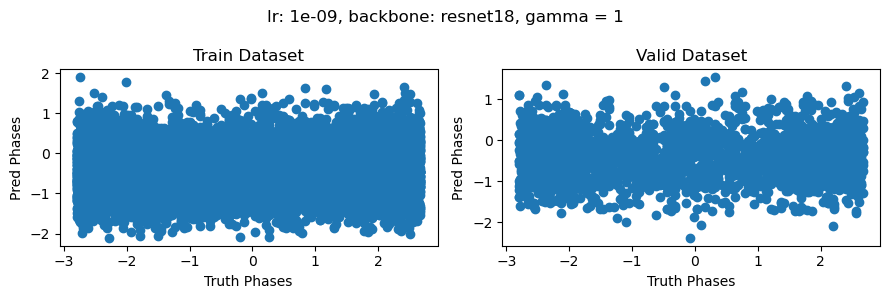

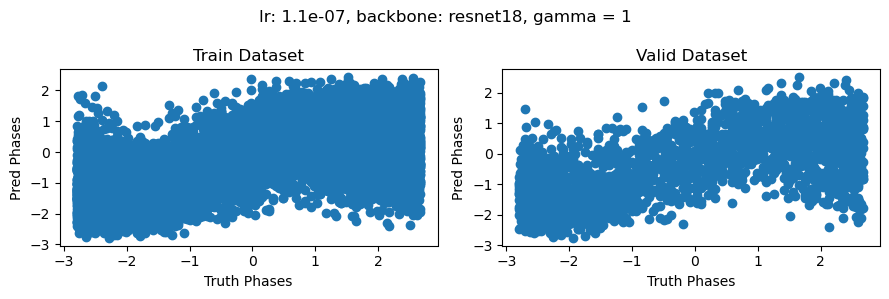

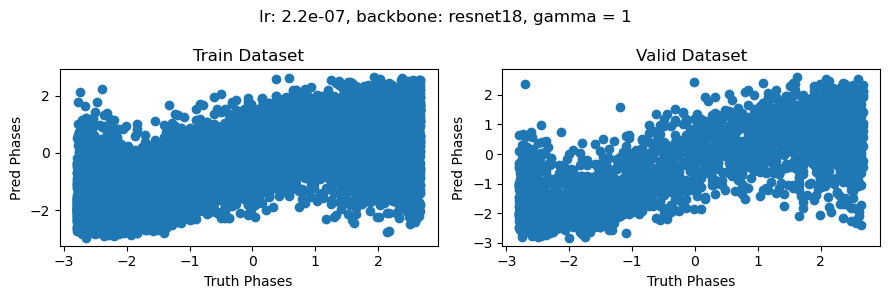

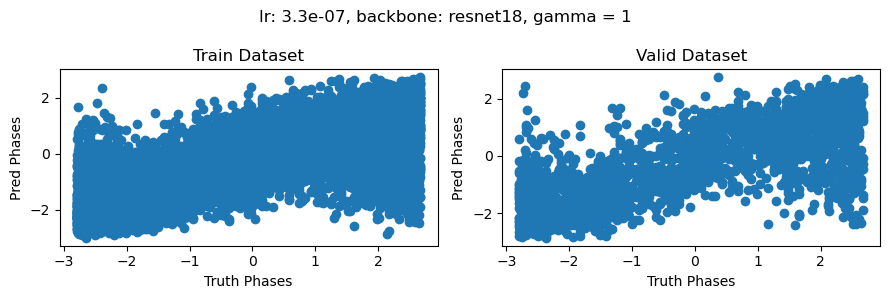

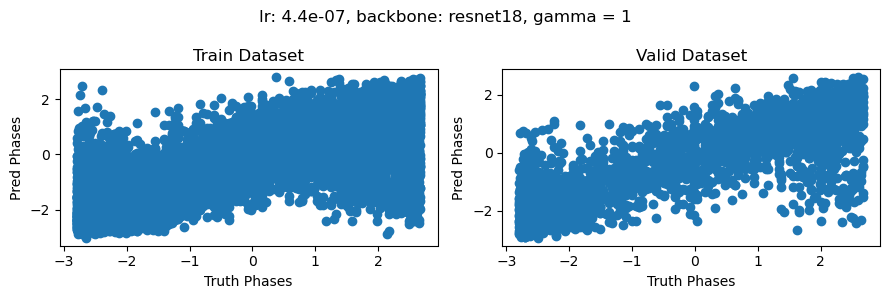

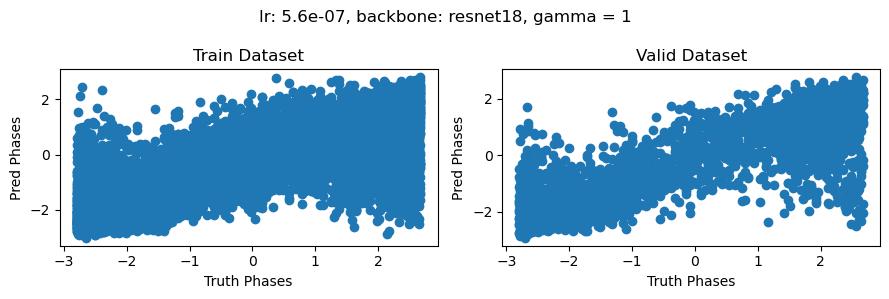

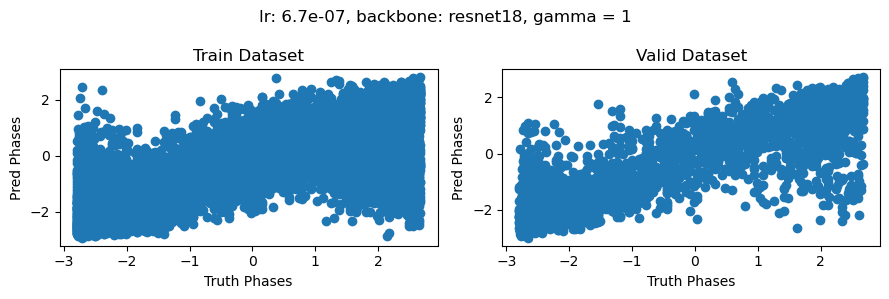

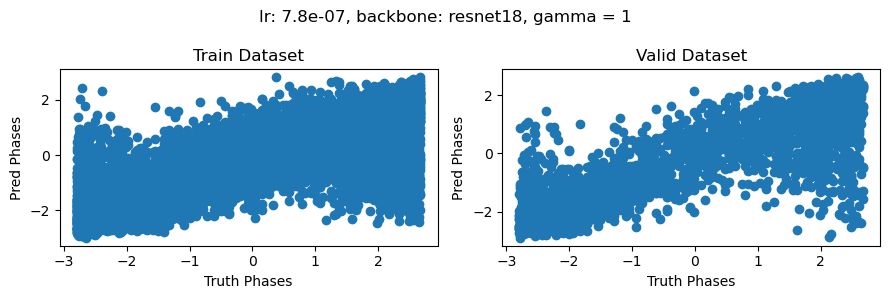

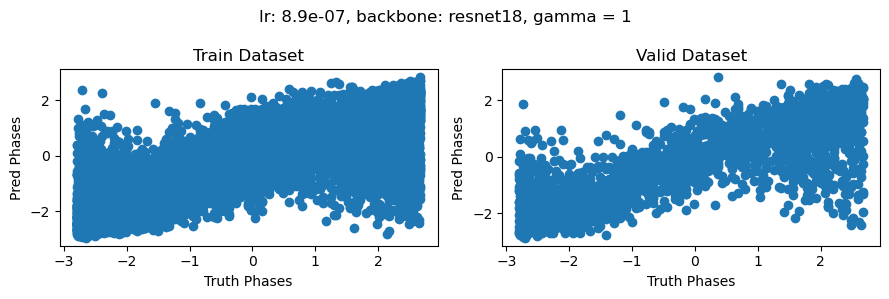

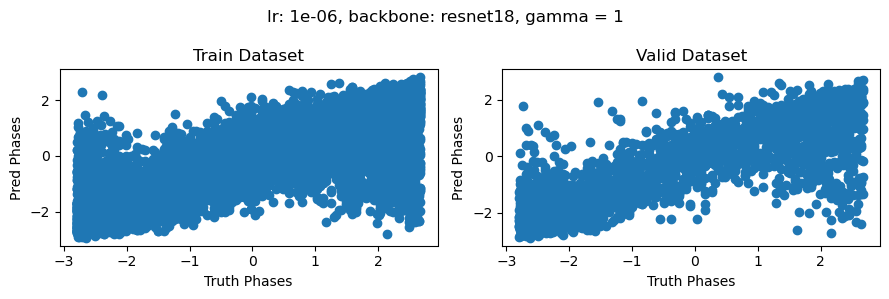

In [17]:
def plot_scatter(train_truth, train_pred, valid_truth, valid_pred, title):
    train_truth = np.concatenate(train_truth)
    valid_truth = np.concatenate(valid_truth)
    train_pred = np.concatenate(train_pred)
    valid_pred = np.concatenate(valid_pred)
    
    fig, ax = plt.subplots(1, 2, figsize = (9,3))
    fig.suptitle(title)

    ax[0].scatter(train_truth, train_pred)
    ax[0].set_title("Train Dataset")
    ax[0].set_xlabel("Truth Phases")
    ax[0].set_ylabel("Pred Phases")

    ax[1].scatter(valid_truth, valid_pred)
    ax[1].set_title("Valid Dataset")
    ax[1].set_xlabel("Truth Phases")
    ax[1].set_ylabel("Pred Phases")

    fig.tight_layout()
    filename = os.path.join(f"images/{title}.pdf")
    fig.savefig(filename)


for (g, t, b, lr, tt, tp, vt, vp) in zip(gamma, title, backbone, learning_rate, train_truth, train_preds, valid_truth, valid_preds):
    if(b == "resnet18"):
        plot_scatter(tt, tp, vt, vp, "lr: " + str(lr) + ", backbone: " + str(b) + ", gamma = 1")
    

In [ ]:
filename = 'enc_only_fixedData.pkl'
data = pickle.load(open(os.path.join(path_results,filename),"rb"))
data = sorted(data, key=lambda x: x['learning_rate'])

In [ ]:
def plot_scatter(train_truth, train_pred, valid_truth, valid_pred, title):
    fig, ax = plt.subplots(1, 2, figsize = (9,3))
    fig.suptitle(title)

    ax[0].scatter(train_truth, train_pred)
    ax[0].set_title("Train Dataset")
    ax[0].set_xlabel("Truth Phases")
    ax[0].set_ylabel("Pred Phases")

    ax[1].scatter(valid_truth, valid_pred)
    ax[1].set_title("Valid Dataset")
    ax[1].set_xlabel("Truth Phases")
    ax[1].set_ylabel("Pred Phases")

    fig.tight_layout()
    # fig.save_fig(title)

# 
for result in data:
    if result['backbone'] == "resnet18":
        plot_scatter(result['train_truth_phase'], result['train_pred_phase'], result['valid_truth_phase'], result['valid_pred_phase'], result['backbone'] + ", lr=" + str(result['learning_rate']))

In [ ]:
plt.close("all")

for result in data:
    if result['backbone'] == "resnet34":
        plot_scatter(result['train_truth_phase'], result['train_pred_phase'], result['valid_truth_phase'], result['valid_pred_phase'], result['backbone'] + ", lr=" + str(result['learning_rate']))

In [ ]:
plt.close("all")

for result in data:
    if result['backbone'] == "resnet50":
        plot_scatter(result['train_truth_phase'], result['train_pred_phase'], result['valid_truth_phase'], result['valid_pred_phase'], result['backbone'] + ", lr=" + str(result['learning_rate']))